In [1]:
# (CPU, DataSize, Y=Time)
import pandas as pd

In [2]:
df = pd.read_csv("testing_28July_bowtie.csv", sep=",") #data from 22July2016 
# copy the 'dup' folder to ~/ProfilingData/.
# remove *Output* files 
# run "python extract.py dup/" to generate testing.csv

In [3]:
len(df)

64

In [4]:
df.head(n=1)

,ppn,mem,seqlen,trial,AvgRSS,AvgSharedTxt,AvgStack,AvgTotal,AvgUnsharedData,CommandTimed,...,PageSize,PercentCPU,SignalsDeliv,SocketMsgRecv,SocketMsgSent,Swaps,SystemTime,UserTime,VolCtxtSwitch,WallTime
0,11,64G,10M,1,0,0,0,0,0,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 1...,...,4096,883%,0,0,0,0,27.49,814.03,823,1:35.29


In [5]:
#find which columns are completely empty
a=len(df[df['AvgRSS'] > 0])
b=len(df[df['AvgSharedTxt'] > 0])
c=len(df[df['AvgStack'] > 0])
d=len(df[df['AvgTotal'] > 0])
e=len(df[df['AvgUnsharedData'] > 0])

print(a,b,c,d,e)

0 0 0 0 0


In [6]:
header = list(df.columns)

In [7]:
i = 1
a = 0
emptyColumns = []
for h in header:
    try:
        a=len(df[df[h] > 0])
        print(a,  h)
        if(a==0): #nothing is greater than zero for this column
            emptyColumns.append(h)
    except:
        print('......................'+ h +' not a scalar')
    i=i+1

64 ppn
......................mem not a scalar
......................seqlen not a scalar
64 trial
0 AvgRSS
0 AvgSharedTxt
0 AvgStack
0 AvgTotal
0 AvgUnsharedData
......................CommandTimed not a scalar
0 ExitStatus
64 FileSysIn
64 FileSysOut
64 InvolCtxtSwitch
32 MajorFaults
64 MaxRSS
64 MinorFaults
64 PageSize
......................PercentCPU not a scalar
0 SignalsDeliv
0 SocketMsgRecv
0 SocketMsgSent
0 Swaps
64 SystemTime
64 UserTime
64 VolCtxtSwitch
......................WallTime not a scalar


In [8]:
emptyColumns.append('trial')
emptyColumns.append('PageSize')
#emptyColumns.append('CommandTimed')
emptyColumns.append('WallTime')

In [9]:
for c in emptyColumns:
    del df[c]

In [10]:
pd.options.display.max_colwidth=500

In [11]:
df.head(4)[["CommandTimed"]]

,CommandTimed
0,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-1 ./outputDir/human-hit-1
1,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-2 ./outputDir/human-hit-2
2,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-1 ./outputDir/human-hit-1
3,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-2 ./outputDir/human-hit-2


In [12]:
commandmap = {'./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-1 ./outputDir/human-hit-1':
             'fltd-1',
             './NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-2 ./outputDir/human-hit-2':
             'fltd-2'}

In [13]:
ft = df.copy(deep=True)

In [14]:
ft['oneORtwo'] = ft['CommandTimed'].map(commandmap)

In [15]:
ft.head(4)[['oneORtwo', 'CommandTimed']]

,oneORtwo,CommandTimed
0,fltd-1,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-1 ./outputDir/human-hit-1
1,fltd-2,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-2 ./outputDir/human-hit-2
2,fltd-1,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-1 ./outputDir/human-hit-1
3,fltd-2,./NGS-ann-program/BIN/bowtie -f -k 1 -v 2 -p 16 ./NodeRefDir/human/human ./data/fltd-2 ./outputDir/human-hit-2


In [16]:
delthis = list(set(ft.columns.values) - set(['ppn','seqlen','SystemTime','UserTime','oneORtwo']))
delthis

['MaxRSS',
 'mem',
 'PercentCPU',
 'CommandTimed',
 'FileSysIn',
 'FileSysOut',
 'VolCtxtSwitch',
 'MajorFaults',
 'InvolCtxtSwitch',
 'MinorFaults']

In [17]:
for c in delthis:
    del ft[c]

In [18]:
#DROP the lines which are NULL
#df = df[df.CommandTimed.notnull()]
len(df)

64

In [19]:
ft['seqFile']=ft['seqlen']+ft['oneORtwo']
ft.head(5)

,ppn,seqlen,SystemTime,UserTime,oneORtwo,seqFile
0,11,10M,27.49,814.03,fltd-1,10Mfltd-1
1,11,10M,27.21,801.46,fltd-2,10Mfltd-2
2,11,15M,27.72,1225.76,fltd-1,15Mfltd-1
3,11,15M,27.28,1217.28,fltd-2,15Mfltd-2
4,11,20M,27.69,1647.21,fltd-1,20Mfltd-1


In [20]:
whatisthesize = {'5Mfltd-1': .27, '10Mfltd-1': .56,'15Mfltd-1': .85,'20Mfltd-1': 1.2,'25Mfltd-1': 1.5,
                 '30Mfltd-1': 1.7,'35Mfltd-1': 2.0,'40Mfltd-1': 2.3, 
                 '5Mfltd-2': .27, '10Mfltd-2': .56,'15Mfltd-2': .85,'20Mfltd-2': 1.2,'25Mfltd-2': 1.5,
                 '30Mfltd-2': 1.7,'35Mfltd-2': 2.0,'40Mfltd-2': 2.3}

#### Add a column for input data set size in GB

In [21]:
ft['sizeGB'] = ft['seqFile'].map(whatisthesize)
ft.head(5)

,ppn,seqlen,SystemTime,UserTime,oneORtwo,seqFile,sizeGB
0,11,10M,27.49,814.03,fltd-1,10Mfltd-1,0.56
1,11,10M,27.21,801.46,fltd-2,10Mfltd-2,0.56
2,11,15M,27.72,1225.76,fltd-1,15Mfltd-1,0.85
3,11,15M,27.28,1217.28,fltd-2,15Mfltd-2,0.85
4,11,20M,27.69,1647.21,fltd-1,20Mfltd-1,1.20


In [22]:
del ft['seqFile']
del ft['seqlen']
del ft['oneORtwo']
ft.head(2)

,ppn,SystemTime,UserTime,sizeGB
0,11,27.49,814.03,0.56
1,11,27.21,801.46,0.56


In [23]:
ft['Y_time']=ft['SystemTime']+ft['UserTime']
del ft['SystemTime']
del ft['UserTime']


In [24]:
ft.head(20)

,ppn,sizeGB,Y_time
0,11,0.56,841.52
1,11,0.56,828.67
2,11,0.85,1253.48
3,11,0.85,1244.56
4,11,1.20,1674.90
5,11,1.20,1665.97
6,11,1.50,2076.99
7,11,1.50,2068.35
8,11,1.70,2473.27
9,11,1.70,2459.98


## Model Training

In [25]:
from sklearn.ensemble.forest import RandomForestRegressor
import numpy as  np

In [26]:
ft.columns[0:2]

Index(['ppn', 'sizeGB'], dtype='object')

In [27]:
ft.columns[2]

'Y_time'

In [28]:
model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)

#### Train and Test Data

In [33]:
np.random.seed()
ft['is_train']=np.random.uniform(0,1,len(ft)) <= .6
train, test = ft[ft['is_train']==True], ft[ft['is_train']==False]
del ft['is_train']
len(train)*1.0 / (len(test)+len(train))

0.640625

In [34]:
features = ft.columns[0:2]
target = ft.columns[2]

X_train = train[features]
Y_train = train[target]

X_test = test[features]
Y_test = test[target].as_matrix()

In [35]:
model.fit(X_train, Y_train.values)
Y_prediction = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
print(rmse)

302.902707746


In [38]:
while(rmse > 50):
    np.random.seed()
    ft['is_train']=np.random.uniform(0,1,len(ft)) <= .8
    train, test = ft[ft['is_train']==True], ft[ft['is_train']==False]
    del ft['is_train']
    len(train)*1.0 / (len(test)+len(train))
    features = ft.columns[0:2]
    target = ft.columns[2]
    X_train = train[features]
    Y_train = train[target]
    X_test = test[features]
    Y_test = test[target].as_matrix()
    model.fit(X_train, Y_train.values)
    Y_prediction = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))


In [39]:
rmse

25.346352281666196

In [40]:
Y_test #Print Y values of test dataset

array([ 1674.9 ,  2076.99,  2473.27,  2858.61,   854.45,  1711.82,
        2136.25,   428.11,  1741.89])

In [41]:
Y_prediction #Print Y predicted values of test dataset

array([ 1664.63302698,  2086.20142078,  2478.64483989,  2912.25895524,
         897.06182786,  1704.628394  ,  2140.84176422,   429.25731422,
        1713.69975067])

In [45]:
import pickle as cPickle
# save the regression model
with open('bowtie_model_rf.pkl', 'wb') as fid:
    cPickle.dump(model, fid)

In [46]:
#load a stored model:
#with open('bowtie_model_rf.pkl', 'rb') as fid:
#    gnb_loaded = cPickle.load(fid)

In [47]:
ft[target].mean(), ft[target].std() * 2

(2030.3582812499994, 2415.6120627747564)

## Cross Validation

In [50]:
model2 = RandomForestRegressor(n_estimators=1500, n_jobs=-1)

#### RMSE

In [51]:
from sklearn import cross_validation

#returns -ve of MSE
scoresMSE = cross_validation.cross_val_score(model2, ft[features], ft[target], cv=10,scoring='mean_squared_error')

In [52]:
#convert MSE to RMSE
rmse = np.sqrt(-scoresMSE)
rmse

array([  438.3664137 ,    78.63297177,    61.22109331,  1779.21562835,
        1490.42658826,    49.69995115,  1688.24991098,   528.51889556,
          29.48970471,    58.54178612])

In [53]:
print("Accuracy: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))

Accuracy: 620.24 (+/- 1396.92)


#### R2 Score

In [54]:
scoresR2 = cross_validation.cross_val_score(model, ft[features], ft[target], cv=5,scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresR2.mean(), scoresR2.std() * 2))

Accuracy: 0.35 (+/- 1.13)


In [55]:
scoresR2

array([ 0.81942117, -0.10037347,  0.53870219, -0.50391625,  0.99760616])

## Plot feature importance

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [59]:

clf = model2

clf.fit(X_train, Y_train.as_matrix())

mse = mean_squared_error(Y_test, clf.predict(X_test))

print("MSE: %.4f" % np.sqrt(mse))


MSE: 26.9579


In [60]:
from sklearn import cross_validation
scores_mse = cross_validation.cross_val_score(clf, ft[features], ft[target].as_matrix(), cv=3,scoring='mean_squared_error')
scores_mse

array([  -61958.78292576, -1068769.14680262,  -122536.38655235])

<function matplotlib.pyplot.show>

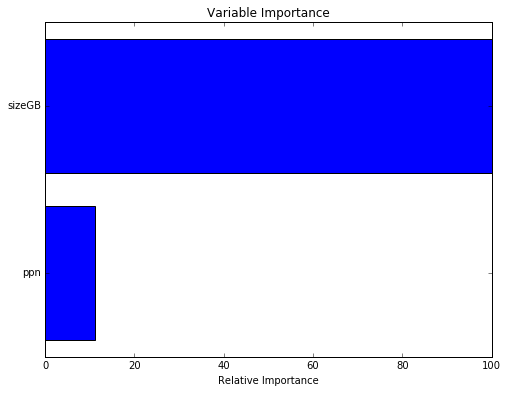

In [74]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show